In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
all_hybrid = pd.read_excel('../mf/all-hybrid-funds-2023.xlsx', skiprows=5, index_col=0)

In [85]:
all_hybrid

,Rating,Category,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,,,,,,,,,,,,,
360 ONE Balanced Hybrid Fund - Direct Plan,NaN,HY-BH,0.59,2023-09-25,629.0,0.7,NaN,NaN,High,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aditya Birla Sun Life Arbitrage Fund - Direct Plan,4.0,HY-AR,0.35,2013-01-01,10549.0,9.4,Below Average,Above Average,Low,0.66,...,8.63,8.19,7.16,6.29,6.62,6.80,4.74,4.52,4.80,7.86
Aditya Birla Sun Life Asset Allocator FoF - Direct Plan,3.0,HY-MAA,0.31,2013-01-01,200.0,4.7,Average,Average,Very High,7.29,...,-30.80,5.18,11.84,18.03,-0.90,7.75,21.59,19.88,2.39,24.45
Aditya Birla Sun Life Balanced Advantage Fund - Direct Plan,3.0,HY-DAA,0.69,2013-01-01,7062.0,7.1,Average,Average,Very High,6.42,...,28.82,4.03,16.79,16.70,1.91,9.25,16.64,14.82,5.51,17.93
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,2.0,HY-AH,1.17,2013-01-01,7377.0,3.1,Above Average,Below Average,Very High,9.41,...,50.01,4.39,10.25,27.55,-3.87,5.55,12.56,25.12,-0.97,22.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UTI Retirement Fund - Direct Plan,NaN,HY-BH,0.98,2013-01-01,4340.0,2.4,NaN,NaN,High,5.48,...,23.75,5.87,10.79,17.73,-0.57,-0.45,13.17,19.32,6.03,17.44
UTI Unit Linked Insurance Plan - Direct Plan,1.0,HY-DAA,0.92,2013-01-01,5309.0,9.4,Average,Low,High,5.95,...,22.30,6.80,7.58,17.77,3.11,0.82,14.90,15.42,-1.60,12.76
WhiteOak Capital Balanced Advantage Fund - Direct Plan,NaN,HY-DAA,0.60,2023-02-10,912.0,1.3,NaN,NaN,Very High,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
all_hybrid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 360 ONE Balanced Hybrid Fund - Direct Plan to WhiteOak Capital Multi Asset Allocation Fund - Direct Plan
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rating                 163 non-null    float64       
 1   Category               216 non-null    object        
 2   Expense Ratio (%)      209 non-null    float64       
 3   Launch                 210 non-null    datetime64[ns]
 4   Net Assets (Cr)        212 non-null    float64       
 5   Fund Manager (Tenure)  216 non-null    float64       
 6   Fund Risk Grade        163 non-null    object        
 7   Fund Return Grade      163 non-null    object        
 8   Riskometer             216 non-null    object        
 9   Standard Deviation     169 non-null    float64       
 10  Sharpe Ratio           169 non-null    float64       
 11  Sortino Ratio          169 non-n

# Data Exploration

Convert return strings to numeric values

In [59]:
all_hybrid['Rating'] = all_hybrid['Rating'].apply(pd.to_numeric, errors='coerce')

In [63]:
all_hybrid['Expense Ratio (%)'] = all_hybrid['Expense Ratio (%)'].apply(pd.to_numeric, errors='coerce')

In [65]:
all_hybrid.iloc[:, 4:6] = all_hybrid.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce')

In [67]:
all_hybrid.iloc[:, 9:] = all_hybrid.iloc[:, 9:].apply(pd.to_numeric, errors='coerce')

In [87]:
all_hybrid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 360 ONE Balanced Hybrid Fund - Direct Plan to WhiteOak Capital Multi Asset Allocation Fund - Direct Plan
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rating                 163 non-null    float64       
 1   Category               216 non-null    object        
 2   Expense Ratio (%)      209 non-null    float64       
 3   Launch                 210 non-null    datetime64[ns]
 4   Net Assets (Cr)        212 non-null    float64       
 5   Fund Manager (Tenure)  216 non-null    float64       
 6   Fund Risk Grade        163 non-null    object        
 7   Fund Return Grade      163 non-null    object        
 8   Riskometer             216 non-null    object        
 9   Standard Deviation     169 non-null    float64       
 10  Sharpe Ratio           169 non-null    float64       
 11  Sortino Ratio          169 non-n

In [89]:
all_hybrid.describe()

,Rating,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,163.000000,209.000000,210,212.000000,216.000000,169.000000,169.000000,169.000000,169.000000,169.000000,...,91.000000,108.000000,114.000000,121.000000,125.000000,139.000000,154.000000,163.000000,173.000000,182.000000
mean,3.000000,0.692536,2016-09-12 21:29:08.571428608,3930.396226,4.061574,6.028047,1.139349,1.999112,0.679586,3.160059,...,26.699011,5.453056,8.552456,16.960000,1.805120,8.128561,12.171039,16.515521,4.385318,17.319725
min,1.000000,0.020000,2002-05-23 00:00:00,6.000000,0.000000,0.620000,-0.620000,-0.990000,0.220000,-2.350000,...,-30.800000,-6.140000,-0.750000,1.990000,-13.380000,-6.840000,-13.400000,-15.580000,-6.220000,6.650000
25%,2.000000,0.380000,2013-01-01 00:00:00,142.000000,2.000000,3.490000,0.910000,1.560000,0.540000,1.460000,...,17.605000,3.632500,6.965000,10.270000,-0.580000,6.545000,9.275000,8.935000,2.360000,12.082500
50%,3.000000,0.630000,2014-11-05 00:00:00,810.000000,3.100000,5.570000,1.130000,2.000000,0.700000,2.580000,...,23.750000,5.815000,8.545000,15.400000,1.950000,8.580000,12.095000,14.720000,4.570000,17.255000
75%,4.000000,0.950000,2020-02-17 00:00:00,3082.750000,5.825000,9.110000,1.420000,2.410000,0.810000,3.810000,...,35.085000,7.825000,10.460000,24.490000,4.520000,10.255000,15.172500,23.520000,6.030000,21.995000
max,5.000000,1.820000,2024-03-27 00:00:00,79875.000000,11.900000,14.840000,2.270000,4.130000,1.060000,19.670000,...,56.830000,14.400000,16.910000,48.400000,8.620000,17.970000,37.280000,80.010000,22.170000,35.470000
std,1.160034,0.358335,NaN,9837.742283,2.911669,3.460947,0.424786,0.776745,0.177356,3.096596,...,14.507836,3.109483,3.237531,8.733697,3.616993,4.065425,6.900061,11.309865,4.103317,6.756392


In [12]:
all_hybrid.isnull().sum()

Rating                    46
Category                   0
Expense Ratio (%)          9
Launch                     0
Net Assets (Cr)            5
Fund Manager (Tenure)      0
Fund Risk Grade            0
Fund Return Grade          0
Riskometer                 0
Standard Deviation        38
Sharpe Ratio              38
Sortino Ratio             38
Beta                      38
Alpha                     38
R-Squared                 38
2014                     104
2015                      86
2016                      80
2017                      72
2018                      68
2019                      53
2020                      38
2021                      29
2022                      19
dtype: int64

In [90]:
all_hybrid.groupby('Category').count()

,Rating,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,Sharpe Ratio,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Category,,,,,,,,,,,,,,,,,,,,,
HY-AH,43,46,47,47,49,43,43,49,43,43,...,25,26,28,30,32,36,40,42,43,44
HY-AR,24,28,28,28,28,24,24,28,25,25,...,10,15,15,17,17,20,23,25,25,26
HY-BH,0,6,6,6,6,0,0,6,4,4,...,4,4,4,4,4,4,4,4,4,4
HY-CH,30,32,31,33,34,30,30,34,30,30,...,22,23,24,25,25,25,28,29,31,31
HY-DAA,24,37,37,37,37,24,24,37,24,24,...,11,14,14,15,16,19,22,23,27,30
HY-EQ S,22,22,23,23,24,22,22,24,22,22,...,6,11,14,15,16,20,22,22,21,22
HY-MAA,20,38,38,38,38,20,20,38,21,21,...,13,15,15,15,15,15,15,18,22,25


In [91]:
pd.crosstab(all_hybrid['Fund Return Grade'], all_hybrid['Fund Risk Grade'])

Fund Risk Grade,Above Average,Average,Below Average,High,Low
Fund Return Grade,,,,,
Above Average,9,9,12,0,8
Average,14,30,10,3,2
Below Average,13,8,5,6,4
High,4,3,2,4,2
Low,3,3,4,5,0


<Axes: xlabel='Fund Return Grade', ylabel='Fund Risk Grade'>

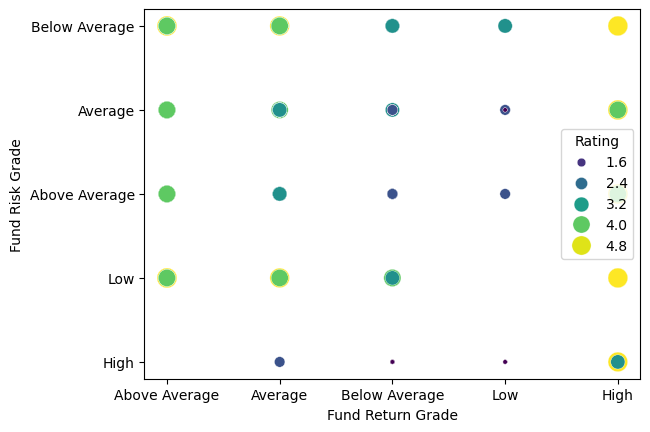

In [92]:
sns.scatterplot(data=all_hybrid, x='Fund Return Grade', y='Fund Risk Grade', hue='Rating', size='Rating', 
                sizes=(10, 200), palette='viridis', legend='brief')

In [93]:
num_columns = all_hybrid.select_dtypes('number').columns.to_list()

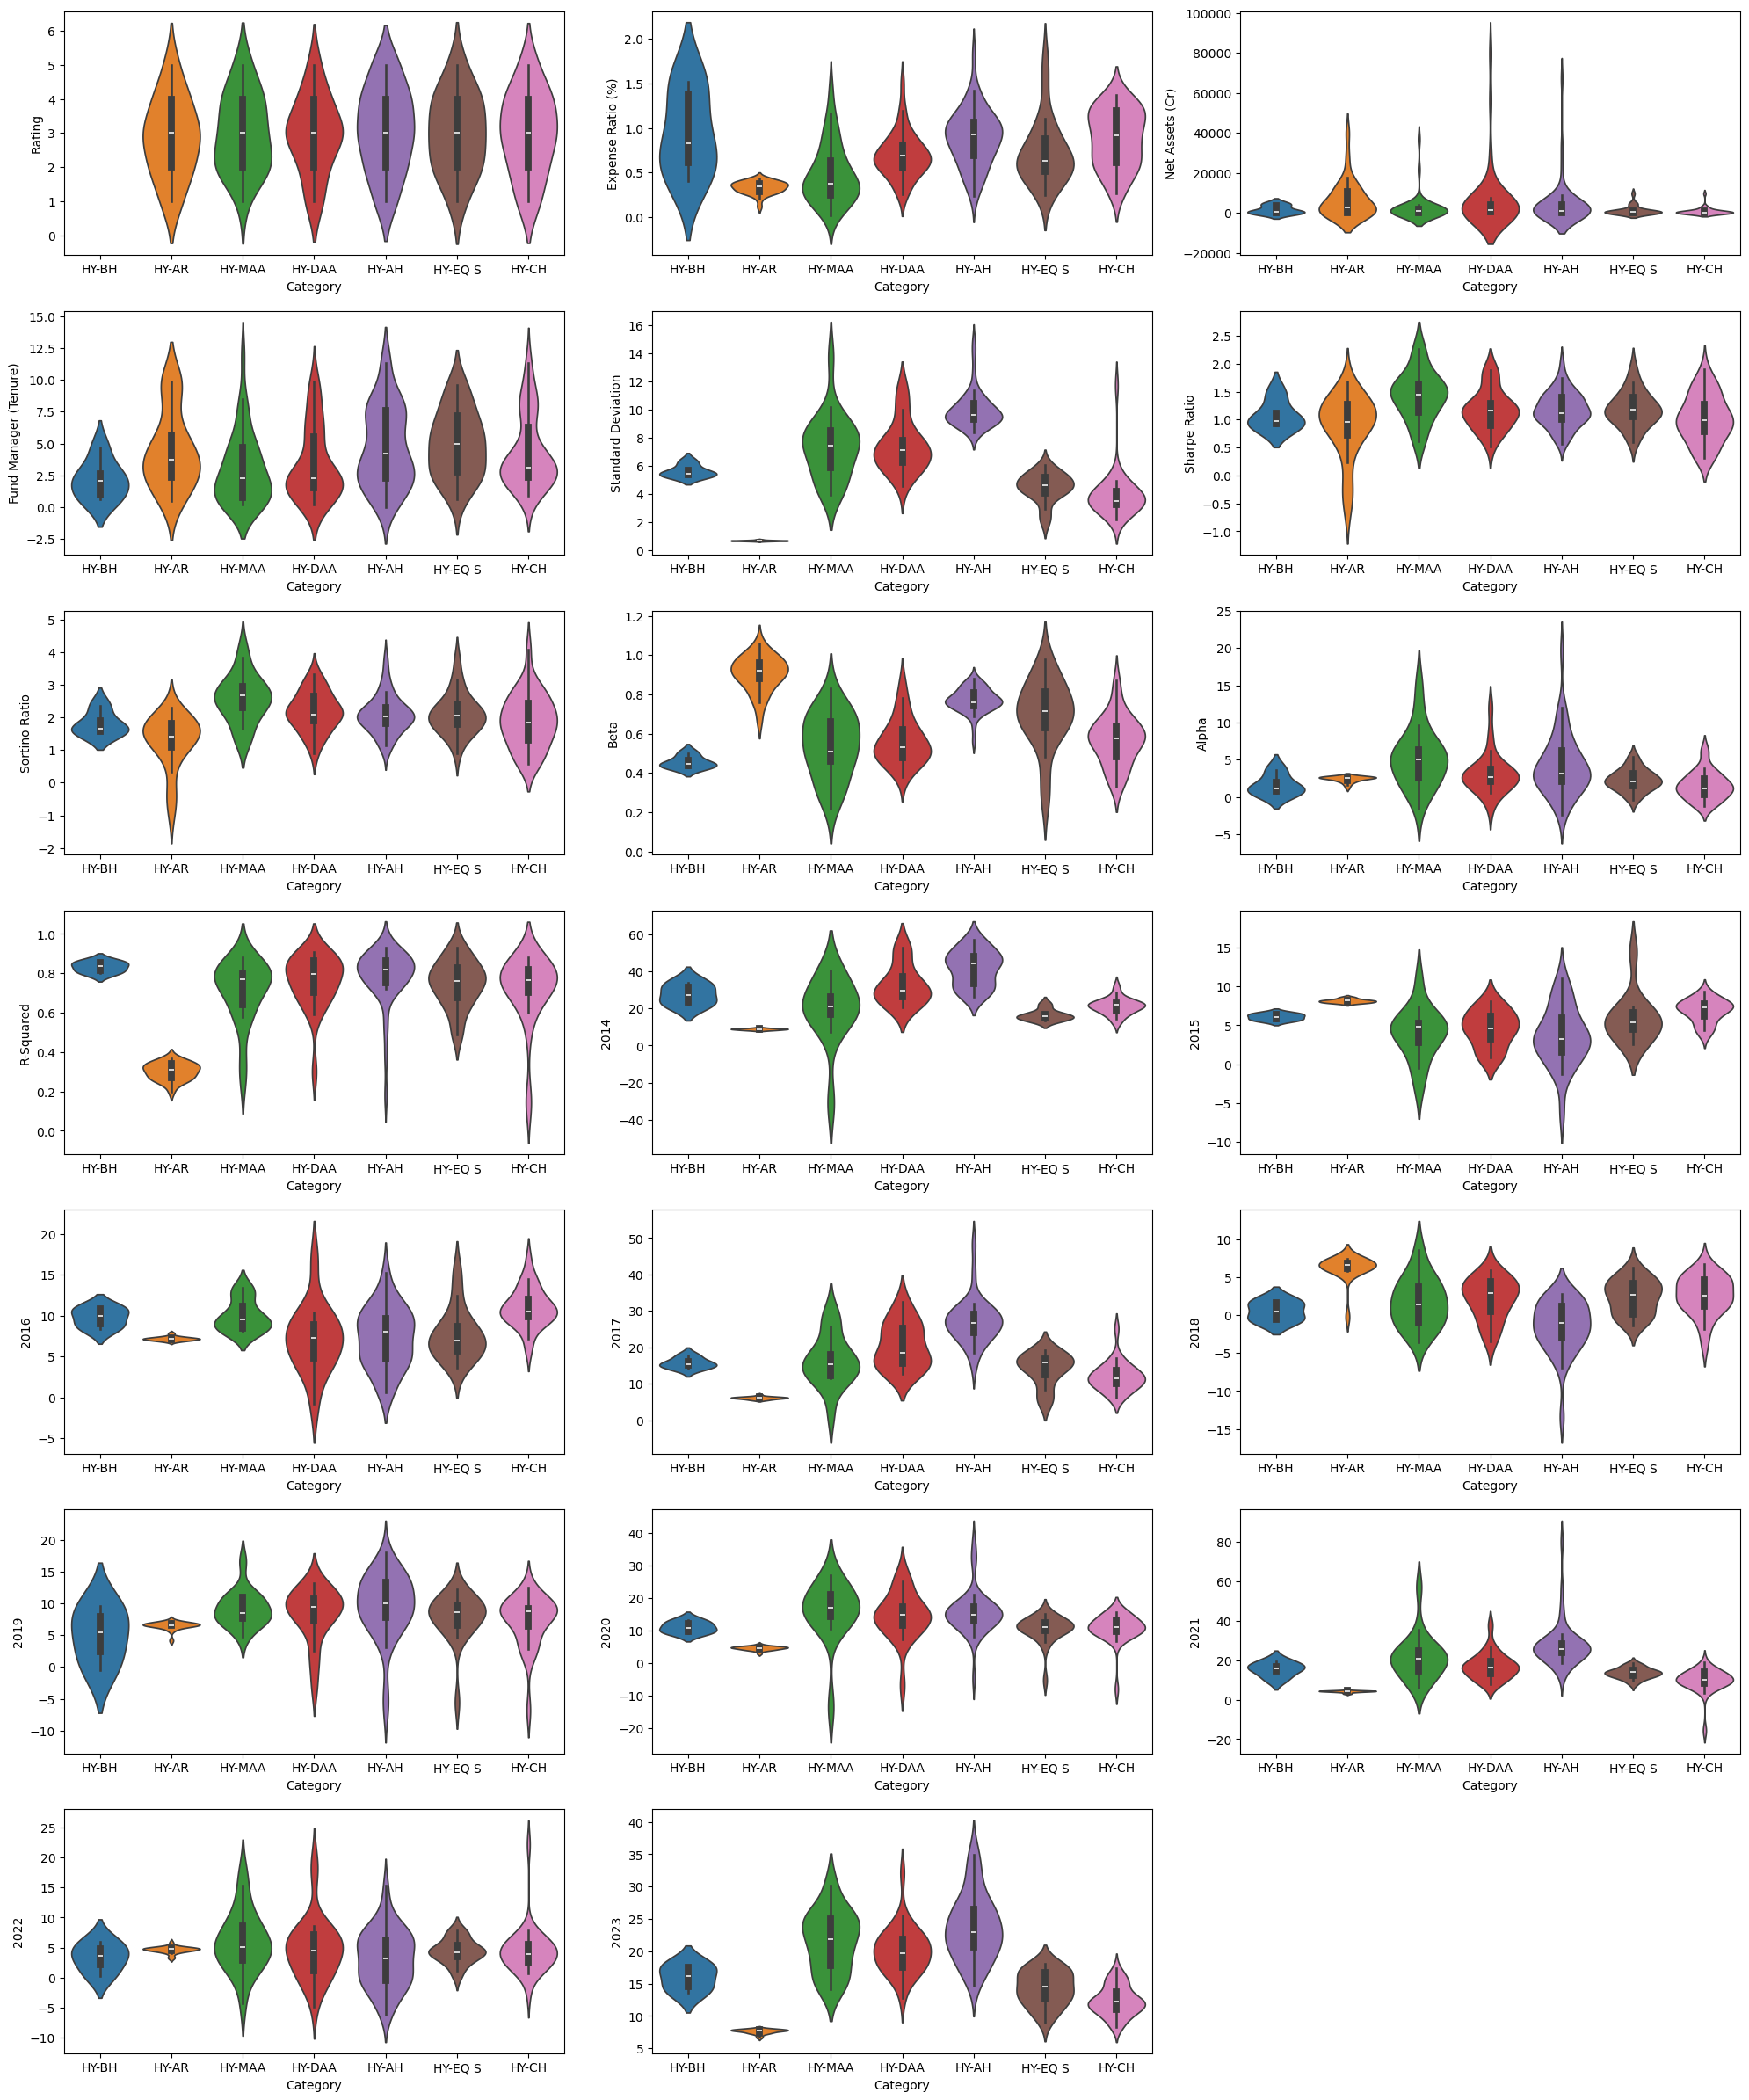

In [95]:
plt.figure(figsize=(20,24))
for i, col in enumerate(num_columns):
    plt.subplot(7, 3, i+1)
    sns.violinplot(data=all_hybrid, x='Category', y=all_hybrid.loc[:, num_columns[i]], hue='Category')
plt.tight_layout()

<Axes: xlabel='Category', ylabel='2023'>

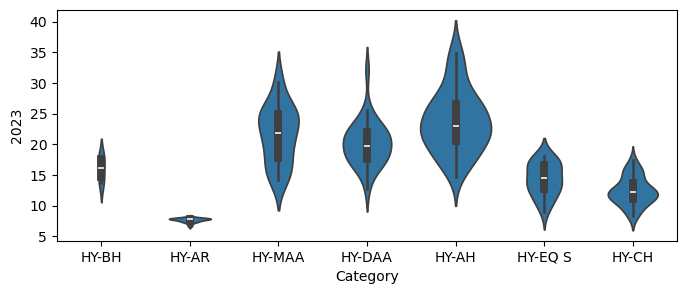

In [97]:
plt.figure(figsize=(8,3))
sns.violinplot(data=all_hybrid, x='Category', y=2023, density_norm='count')

In [100]:
all_hybrid.groupby('Category').mean(numeric_only=True).sort_values(by=2023)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Category,,,,,,,,,,,,,,,,,,,,
HY-AR,2.875000,0.332857,6805.250000,4.489286,0.682400,0.880400,1.259200,0.905600,2.404400,0.302000,8.848000,8.151333,7.197333,6.150588,6.225294,6.492500,4.650870,4.127200,4.653200,7.643846
HY-CH,3.000000,0.880000,861.878788,4.352941,3.944333,1.023667,1.884333,0.568333,1.550333,0.718333,21.291818,6.905217,11.020833,11.973200,2.633200,7.228800,10.816786,9.681034,4.453548,12.387419
HY-EQ S,3.000000,0.734545,1317.521739,4.966667,4.485000,1.193636,2.115000,0.701818,2.297727,0.748182,16.466667,5.943636,7.712857,14.080667,2.438125,7.873000,10.463182,13.487727,4.421429,14.305000
HY-BH,NaN,0.948333,1659.500000,2.150000,5.620000,1.075000,1.807500,0.455000,1.605000,0.832500,27.617500,6.100000,9.795000,15.705000,0.560000,5.002500,11.067500,15.437500,3.385000,15.952500
HY-DAA,2.958333,0.697838,6942.459459,3.413514,7.417083,1.177083,2.174583,0.561250,3.122083,0.760000,32.920909,4.587143,7.204286,20.600000,2.148750,8.289474,14.716818,17.083913,4.802222,20.154000
HY-MAA,3.000000,0.487368,2655.842105,2.968421,7.338571,1.440952,2.573810,0.540000,5.260476,0.709048,19.860769,3.960667,10.037333,16.458667,1.708000,9.163333,16.010667,21.470000,6.045909,21.630000
HY-AH,3.093023,0.892826,4600.042553,4.742857,10.001860,1.180465,2.089302,0.769535,4.303721,0.785581,41.724800,3.631923,7.283571,27.278667,-1.477188,9.635556,15.652750,27.862619,3.144419,23.762500


In [102]:
all_hybrid_mean = all_hybrid.groupby('Category').mean(numeric_only=True).sort_values(by=2023)

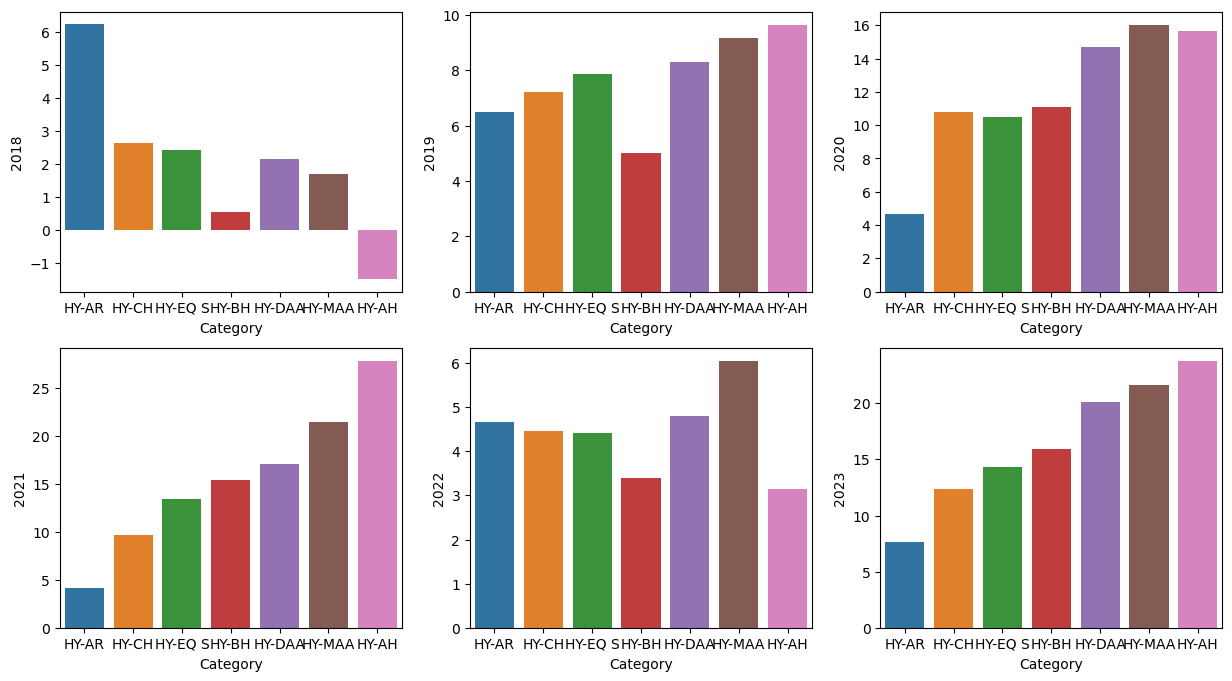

In [105]:
fig, axes = plt.subplots(2,3,figsize=(15,8))
for i, ax in enumerate(axes.ravel()):
    sns.barplot(data=all_hybrid_mean, x=all_hybrid_mean.index, y=all_hybrid_mean.iloc[:, i+14],
                hue=all_hybrid_mean.index, ax=ax)

In [107]:
all_hybrid.groupby('Category').std(numeric_only=True).sort_values(by=2023)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Category,,,,,,,,,,,,,,,,,,,,
HY-AR,1.153916,0.070283,9483.807583,2.992873,0.034312,0.569470,0.824186,0.089213,0.404991,0.042817,0.438933,0.236850,0.247111,0.367142,1.702014,0.636742,0.600764,0.481936,0.530438,0.352046
HY-BH,NaN,0.476127,2101.036387,1.516245,0.431045,0.259936,0.370439,0.031091,1.385749,0.027538,5.638046,0.415131,1.205584,1.468843,1.286908,4.457364,1.740314,3.618078,2.424823,2.022414
HY-CH,1.203443,0.320544,1817.148604,2.814167,1.660413,0.422272,0.827258,0.126657,1.882562,0.179330,4.456007,1.492319,2.420760,3.977682,2.581122,4.035309,4.412070,5.944346,3.969759,2.270680
HY-EQ S,1.154701,0.365887,2313.625370,2.581484,1.029289,0.317108,0.637060,0.176598,1.463531,0.118629,2.952847,3.200126,3.132891,4.481692,2.278892,3.769244,4.188088,2.683072,2.026475,2.656252
HY-DAA,1.122078,0.254036,16022.236594,2.814858,1.818644,0.359317,0.604239,0.117707,2.710861,0.135036,10.692548,2.348186,4.072302,6.251575,2.707784,4.158184,7.264429,6.711892,5.165995,3.677035
HY-MAA,1.123903,0.329510,6720.354554,2.732992,2.281200,0.438131,0.733999,0.163768,3.935307,0.158805,18.044463,3.336357,1.910110,7.003545,3.260844,2.792916,9.358959,11.477539,4.987184,4.659603
HY-AH,1.230833,0.315515,11117.568625,3.095292,1.293736,0.310943,0.588685,0.061951,4.105047,0.142048,9.563962,3.806190,3.634927,6.199095,3.434209,5.126550,6.735479,11.099543,4.788328,5.065619


In [108]:
iqr = all_hybrid[num_columns + ['Category']].groupby('Category').quantile(.75) - \
      all_hybrid[num_columns + ['Category']].groupby('Category').quantile(.25)
iqr.sort_values(by=2022)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Category,,,,,,,,,,,,,,,,,,,,
HY-AR,2.0,0.0900,10633.75,3.275,0.0400,0.5500,0.7200,0.0800,0.4500,0.0700,0.5800,0.315,0.2600,0.450,0.620,0.3225,0.7000,0.4400,0.4600,0.4500
HY-EQ S,2.0,0.3700,768.50,4.375,1.1125,0.3450,0.6100,0.1850,1.5900,0.1525,1.7400,2.055,3.0750,4.200,4.055,3.1375,2.4350,2.6625,1.8700,4.0125
HY-BH,NaN,0.7650,3212.00,1.650,0.2850,0.1850,0.3225,0.0250,1.1300,0.0375,8.2275,0.590,1.8050,1.100,2.140,5.5425,2.2825,2.3375,2.5400,2.9375
HY-CH,2.0,0.5825,725.00,3.925,0.9200,0.4925,1.1250,0.1575,2.1000,0.1150,4.2425,1.605,2.1675,3.630,3.410,2.7600,3.5250,5.5300,3.0900,2.6400
HY-MAA,2.0,0.3875,1902.25,3.950,2.5900,0.5100,0.6300,0.2000,3.7500,0.1600,9.3900,2.460,2.6650,5.925,4.720,3.3050,6.5950,10.2075,5.7325,7.2100
HY-DAA,2.0,0.2600,3246.00,4.000,1.5375,0.3975,0.7475,0.1425,1.7075,0.1600,10.6850,2.920,4.0725,9.670,4.005,3.4400,5.7175,6.4750,6.0000,4.4025
HY-AH,2.0,0.3700,3846.50,5.300,1.1550,0.3900,0.4800,0.0700,4.0950,0.1150,14.6900,4.385,4.9425,5.240,4.235,5.5300,4.1875,4.3150,6.8100,5.8825


In [109]:
pd.melt(iqr.reset_index(), id_vars=['Category'], )

,Category,variable,value
0,HY-AH,Rating,2.0000
1,HY-AR,Rating,2.0000
2,HY-BH,Rating,NaN
3,HY-CH,Rating,2.0000
4,HY-DAA,Rating,2.0000
...,...,...,...
135,HY-BH,2023,2.9375
136,HY-CH,2023,2.6400
137,HY-DAA,2023,4.4025
138,HY-EQ S,2023,4.0125


# Analysis of one Category type

In [110]:
all_hybrid['Category'].unique()

array(['HY-BH', 'HY-AR', 'HY-MAA', 'HY-DAA', 'HY-AH', 'HY-EQ S', 'HY-CH'],
      dtype=object)

In [111]:
one_hybrid = all_hybrid[all_hybrid['Category'] == 'HY-AH']

In [112]:
one_hybrid.iloc[:, 9:15]

,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared
Funds,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,9.41,0.93,1.34,0.75,1.46,0.81
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan,9.61,0.73,1.47,0.75,-0.34,0.78
Axis Children's Gift - Direct Plan,10.32,0.56,0.95,0.83,-2.35,0.82
Axis Equity Hybrid Fund - Direct Plan,10.74,0.66,1.35,0.87,-1.46,0.85
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,11.37,0.69,1.13,0.85,-0.55,0.72
Bandhan Asset Allocation Fund - Aggressive Plan - Direct Plan,8.77,1.06,1.85,0.71,2.33,0.84
Bandhan Hybrid Equity Fund - Direct Plan,10.01,1.07,1.80,0.80,2.86,0.82
Bandhan Retirement Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan,13.93,1.34,1.90,0.76,11.22,0.38


<Axes: >

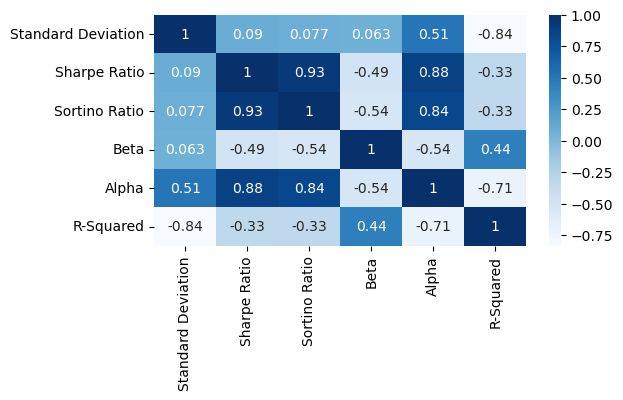

In [113]:
plt.figure(figsize=(6,3))
sns.heatmap(one_hybrid.iloc[:, 9:15].corr(), annot=True, cmap='Blues')

In [114]:
df = one_hybrid.iloc[:, -9:]
df

,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,4.39,10.25,27.55,-3.87,5.55,12.56,25.12,-0.97,22.23
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,16.25,12.52,1.61,20.66
Axis Children's Gift - Direct Plan,NaN,3.82,24.49,1.78,14.60,17.04,28.04,-6.22,14.72
Axis Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,15.86,16.65,25.04,-3.95,15.56
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,18.36,18.47,-5.62,21.49
Bandhan Asset Allocation Fund - Aggressive Plan - Direct Plan,3.19,6.25,22.97,-2.28,5.54,12.71,21.86,-0.74,23.20
Bandhan Hybrid Equity Fund - Direct Plan,NaN,NaN,NaN,-2.30,6.13,15.38,32.44,0.22,21.95
Bandhan Retirement Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan,NaN,NaN,48.40,-13.38,-3.81,32.23,55.77,-3.76,34.92


In [115]:
df.head()

,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,4.39,10.25,27.55,-3.87,5.55,12.56,25.12,-0.97,22.23
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,16.25,12.52,1.61,20.66
Axis Children's Gift - Direct Plan,NaN,3.82,24.49,1.78,14.60,17.04,28.04,-6.22,14.72
Axis Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,15.86,16.65,25.04,-3.95,15.56
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,18.36,18.47,-5.62,21.49


In [116]:
df.shape

(49, 9)

In [117]:
df.describe()

,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,26.000000,28.000000,30.000000,32.000000,36.000000,40.000000,42.000000,43.000000,44.000000
mean,3.631923,7.283571,27.278667,-1.477187,9.635556,15.652750,27.862619,3.144419,23.762500
std,3.806190,3.634927,6.199095,3.434209,5.126550,6.735479,11.099543,4.788328,5.065619
min,-6.140000,0.610000,15.020000,-13.380000,-6.840000,-4.550000,12.520000,-6.220000,14.720000
25%,1.555000,4.677500,23.950000,-3.000000,7.792500,13.017500,23.997500,-0.520000,20.602500
50%,3.230000,7.990000,26.740000,-0.970000,9.990000,14.845000,25.520000,3.160000,22.930000
75%,5.940000,9.620000,29.190000,1.235000,13.322500,17.205000,28.312500,6.290000,26.485000
max,11.060000,15.230000,48.400000,2.790000,17.970000,37.280000,80.010000,15.260000,35.470000


number of mutual funds in each year

In [118]:
df.count()

2015    26
2016    28
2017    30
2018    32
2019    36
2020    40
2021    42
2022    43
2023    44
dtype: int64

number of years each mutual fund is operating

In [119]:
df.count(axis=1)

Funds
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan                 9
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan         4
Axis Children's Gift - Direct Plan                                         8
Axis Equity Hybrid Fund - Direct Plan                                      5
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan               4
Bandhan Asset Allocation Fund - Aggressive Plan - Direct Plan              9
Bandhan Hybrid Equity Fund - Direct Plan                                   6
Bandhan Retirement Fund - Direct Plan                                      0
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan             7
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan                    6
Baroda BNP Paribas Retirement Fund - Direct Plan                           0
Canara Robeco Equity Hybrid Fund - Direct Plan                             9
DSP Equity & Bond Fund - Direct Plan                                  

average return of all funds by year

In [120]:
df.mean()

2015     3.631923
2016     7.283571
2017    27.278667
2018    -1.477187
2019     9.635556
2020    15.652750
2021    27.862619
2022     3.144419
2023    23.762500
dtype: float64

percentage of funds having positive return by year

In [121]:
(df>0).sum() / df.count() * 100

2015     84.615385
2016    100.000000
2017    100.000000
2018     34.375000
2019     94.444444
2020     97.500000
2021    100.000000
2022     69.767442
2023    100.000000
dtype: float64

Select funds with minimum years of history and from recent years

In [122]:
dfd = df.iloc[:, :].dropna(thresh=3)
dfd.shape

(42, 9)

In [123]:
dfd.count(axis=1)

Funds
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan                 9
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan         4
Axis Children's Gift - Direct Plan                                         8
Axis Equity Hybrid Fund - Direct Plan                                      5
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan               4
Bandhan Asset Allocation Fund - Aggressive Plan - Direct Plan              9
Bandhan Hybrid Equity Fund - Direct Plan                                   6
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan             7
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan                    6
Canara Robeco Equity Hybrid Fund - Direct Plan                             9
DSP Equity & Bond Fund - Direct Plan                                       9
Edelweiss Aggressive Hybrid Fund - Direct Plan                             9
Franklin India Equity Hybrid Fund - Direct Plan                       

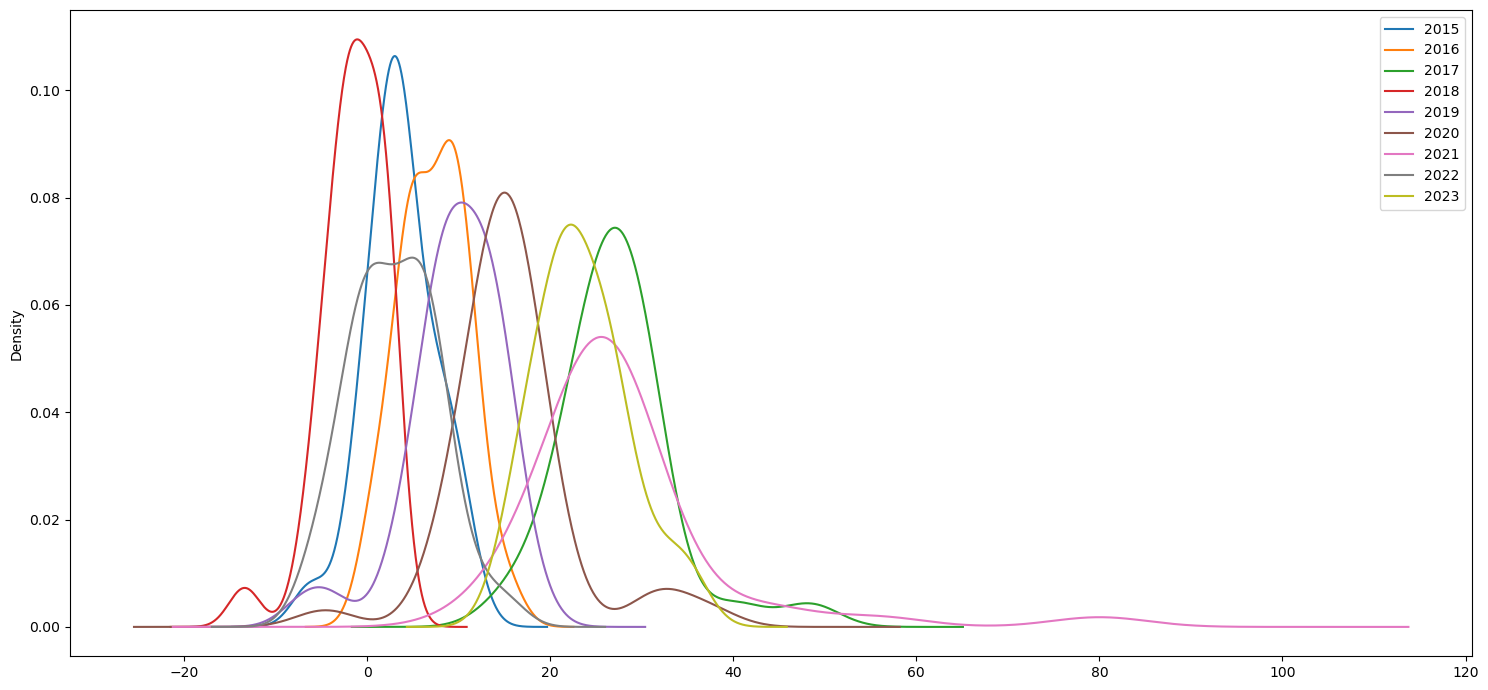

In [124]:
dfd.plot.kde(figsize=(15,7))
plt.tight_layout()
plt.show()

# CAGR

Cumulative Annual Growth Rate

In [125]:
def total_return(x):
    s = 1
    for i in x:
        if not np.isnan(i):
            s *= (1 + i/100)
    return s

In [126]:
cagr = (dfd.apply(lambda row : total_return(row), axis=1)**(1/dfd.count(axis=1)) - 1).sort_values(ascending=False)
cagr.name = 'cagr'

In [127]:
cagr.sort_values(ascending=False)

Funds
SBI Magnum Children's Benefit Fund - Investment Plan - Direct Plan         0.359786
Mahindra Manulife Aggressive Hybrid Fund - Direct Plan                     0.206573
ICICI Prudential Retirement Fund - Hybrid Aggressive Plan - Direct Plan    0.191246
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan             0.186326
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan            0.163808
Quant Absolute Fund - Direct Plan                                          0.161776
Union Aggressive Hybrid Fund - Direct Plan                                 0.160472
ICICI Prudential Equity & Debt Fund - Direct Plan                          0.157061
Mirae Asset Aggressive Hybrid Fund - Direct Plan                           0.150069
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan                    0.147172
Groww Aggressive Hybrid Fund - Direct Plan                                 0.145491
HDFC Children's Gift Fund - Direct Plan                               

# Ergodic Sum

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
values = dfd.to_numpy()

In [130]:
scaled = StandardScaler(with_mean=False, with_std=True).fit_transform(values)

In [131]:
scaled = np.round(scaled, 3)

In [132]:
scaled_dfd = pd.DataFrame(scaled, index=dfd.index, columns=dfd.columns)

In [133]:
scaled_dfd

,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,1.176,2.872,4.520,-1.145,1.098,1.889,2.291,-0.205,4.493
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,2.443,1.142,0.340,4.176
Axis Children's Gift - Direct Plan,NaN,1.070,4.018,0.527,2.888,2.562,2.557,-1.314,2.975
Axis Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,3.138,2.503,2.283,-0.835,3.145
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,2.761,1.684,-1.187,4.344
Bandhan Asset Allocation Fund - Aggressive Plan - Direct Plan,0.855,1.751,3.769,-0.675,1.096,1.911,1.993,-0.156,4.689
Bandhan Hybrid Equity Fund - Direct Plan,NaN,NaN,NaN,-0.680,1.213,2.313,2.958,0.046,4.437
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan,NaN,NaN,7.941,-3.958,-0.754,4.846,5.085,-0.794,7.058
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan,NaN,NaN,NaN,0.586,3.555,2.523,2.216,1.285,4.655


In [134]:
(scaled_dfd>0).sum()/scaled_dfd.count()

2015    0.846154
2016    1.000000
2017    1.000000
2018    0.343750
2019    0.944444
2020    0.975000
2021    1.000000
2022    0.690476
2023    1.000000
dtype: float64

In [135]:
ergodic = (scaled_dfd[scaled_dfd>0].sum(axis=1).add(2*scaled_dfd[scaled_dfd<0].sum(axis=1))/dfd.count(axis=1)).sort_values(ascending=False)
ergodic.name = 'ergodic'
ergodic

Funds
SBI Magnum Children's Benefit Fund - Investment Plan - Direct Plan         4.991667
Mahindra Manulife Aggressive Hybrid Fund - Direct Plan                     3.103250
ICICI Prudential Retirement Fund - Hybrid Aggressive Plan - Direct Plan    3.014500
ICICI Prudential Equity & Debt Fund - Direct Plan                          2.757778
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan            2.707286
Mirae Asset Aggressive Hybrid Fund - Direct Plan                           2.642875
Quant Absolute Fund - Direct Plan                                          2.628778
HDFC Children's Gift Fund - Direct Plan                                    2.500778
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan                    2.470000
Tata Retirement Savings Fund - Moderate Plan - Direct Plan                 2.427222
Groww Aggressive Hybrid Fund - Direct Plan                                 2.370000
Canara Robeco Equity Hybrid Fund - Direct Plan                        

without standardizing

In [136]:
(dfd[dfd>0].sum(axis=1).add(2*dfd[dfd<0].sum(axis=1))/dfd.count(axis=1)).sort_values(ascending=False).head(10)

Funds
SBI Magnum Children's Benefit Fund - Investment Plan - Direct Plan         39.240000
Mahindra Manulife Aggressive Hybrid Fund - Direct Plan                     21.065000
ICICI Prudential Retirement Fund - Hybrid Aggressive Plan - Direct Plan    19.765000
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan             18.488571
Quant Absolute Fund - Direct Plan                                          16.962222
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan            16.882857
Union Aggressive Hybrid Fund - Direct Plan                                 16.670000
ICICI Prudential Equity & Debt Fund - Direct Plan                          16.320000
Mirae Asset Aggressive Hybrid Fund - Direct Plan                           15.368750
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan                    15.023333
dtype: float64

# Average Ranking

Ranking of each fund in each year - bigger number is better

In [137]:
dfdr = dfd.rank(axis=0, ascending = True)
dfdr

,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,18.0,22.0,18.0,7.0,6.0,9.0,20.0,9.0,19.0
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,25.0,1.0,18.0,12.5
Axis Children's Gift - Direct Plan,NaN,4.5,10.0,26.0,32.0,30.0,29.0,1.0,1.0
Axis Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,35.0,26.0,19.0,3.0,2.0
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,33.0,5.0,2.0,16.0
Bandhan Asset Allocation Fund - Aggressive Plan - Direct Plan,13.0,13.0,6.0,13.0,5.0,10.0,7.0,10.0,24.0
Bandhan Hybrid Equity Fund - Direct Plan,NaN,NaN,NaN,12.0,7.0,23.0,37.0,14.0,18.0
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan,NaN,NaN,30.0,1.0,2.0,39.0,41.0,4.0,41.0
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan,NaN,NaN,NaN,28.0,36.0,27.0,13.0,29.0,23.0


Percentile ranking of funds

In [138]:
dfdr = dfdr/dfdr.count()*100
dfdr.head()

,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,69.230769,78.571429,60.000000,21.875,16.666667,22.5,47.619048,21.428571,45.238095
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,62.5,2.380952,42.857143,29.761905
Axis Children's Gift - Direct Plan,NaN,16.071429,33.333333,81.250,88.888889,75.0,69.047619,2.380952,2.380952
Axis Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,97.222222,65.0,45.238095,7.142857,4.761905
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,82.5,11.904762,4.761905,38.095238


## Funds in top percentile

In [139]:
top_percentile = (dfdr[dfdr>=50].count(axis=1)/dfdr.count(axis=1)).sort_values(ascending=False)

In [140]:
top_percentile.name = 'top_percentile'

In [141]:
top_percentile.head(10)

Funds
Mahindra Manulife Aggressive Hybrid Fund - Direct Plan                     1.000000
SBI Magnum Children's Benefit Fund - Investment Plan - Direct Plan         1.000000
Mirae Asset Aggressive Hybrid Fund - Direct Plan                           0.875000
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan            0.857143
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan                    0.833333
DSP Equity & Bond Fund - Direct Plan                                       0.777778
ICICI Prudential Equity & Debt Fund - Direct Plan                          0.777778
HDFC Children's Gift Fund - Direct Plan                                    0.777778
ICICI Prudential Retirement Fund - Hybrid Aggressive Plan - Direct Plan    0.750000
Edelweiss Aggressive Hybrid Fund - Direct Plan                             0.666667
Name: top_percentile, dtype: float64

## Average percentile rank

In [142]:
dfdr['rank'] = dfdr.sum(axis=1)/dfdr.count(axis=1)/100

In [143]:
dfdr.sort_values(by='rank', ascending=False)

,2015,2016,2017,2018,2019,2020,2021,2022,2023,rank
Funds,,,,,,,,,,
SBI Magnum Children's Benefit Fund - Investment Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,73.809524,92.857143,0.888889
Mahindra Manulife Aggressive Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,90.00,90.476190,77.380952,66.666667,0.811310
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan,NaN,NaN,83.333333,75.000,41.666667,87.50,57.142857,71.428571,76.190476,0.703231
ICICI Prudential Retirement Fund - Hybrid Aggressive Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,60.00,76.190476,45.238095,95.238095,0.691667
HDFC Children's Gift Fund - Direct Plan,46.153846,60.714286,93.333333,65.625,30.555556,85.00,66.666667,88.095238,85.714286,0.690954
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan,NaN,NaN,NaN,87.500,100.000000,67.50,30.952381,69.047619,54.761905,0.682937
Mirae Asset Aggressive Hybrid Fund - Direct Plan,NaN,82.142857,80.000000,100.000,80.555556,55.00,52.380952,57.142857,29.761905,0.671230
ICICI Prudential Equity & Debt Fund - Direct Plan,53.846154,100.000000,43.333333,59.375,52.777778,12.50,92.857143,97.619048,88.095238,0.667115
Kotak Equity Hybrid Fund - Direct Plan,57.692308,96.428571,36.666667,12.500,94.444444,72.50,83.333333,80.952381,40.476190,0.638882


# More than mean returns

In [144]:
dfd.mean()

2015     3.631923
2016     7.283571
2017    27.278667
2018    -1.477187
2019     9.635556
2020    15.652750
2021    27.862619
2022     3.033571
2023    23.544048
dtype: float64

Excess return of fund (fund return - mean return in year)

In [145]:
dfdm = dfd-dfd.mean()
dfdm

,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,
Aditya Birla Sun Life Equity Hybrid '95 Fund - Direct Plan,0.758077,2.966429,0.271333,-2.392813,-4.085556,-3.09275,-2.742619,-4.003571,-1.314048
Aditya Birla Sun Life Retirement Fund - The 40s Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,0.59725,-15.342619,-1.423571,-2.884048
Axis Children's Gift - Direct Plan,NaN,-3.463571,-2.788667,3.257187,4.964444,1.38725,0.177381,-9.253571,-8.824048
Axis Equity Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,6.224444,0.99725,-2.822619,-6.983571,-7.984048
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,2.70725,-9.392619,-8.653571,-2.054048
Bandhan Asset Allocation Fund - Aggressive Plan - Direct Plan,-0.441923,-1.033571,-4.308667,-0.802812,-4.095556,-2.94275,-6.002619,-3.773571,-0.344048
Bandhan Hybrid Equity Fund - Direct Plan,NaN,NaN,NaN,-0.822812,-3.505556,-0.27275,4.577381,-2.813571,-1.594048
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan,NaN,NaN,21.121333,-11.902813,-13.445556,16.57725,27.907381,-6.793571,11.375952
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan,NaN,NaN,NaN,3.457187,8.334444,1.12725,-3.562619,3.046429,-0.514048


## alpha

In [146]:
alpha = (dfdm.sum(axis=1)/dfdm.count(axis=1)).sort_values(ascending=False)
alpha.name = 'alpha'
alpha

Funds
SBI Magnum Children's Benefit Fund - Investment Plan - Direct Plan         21.093254
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan              6.405711
Quant Absolute Fund - Direct Plan                                           4.126054
Mahindra Manulife Aggressive Hybrid Fund - Direct Plan                      3.541753
ICICI Prudential Equity & Debt Fund - Direct Plan                           3.460498
ICICI Prudential Retirement Fund - Hybrid Aggressive Plan - Direct Plan     2.241753
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan                     1.981441
HDFC Children's Gift Fund - Direct Plan                                     1.859387
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan             1.807140
Tata Retirement Savings Fund - Moderate Plan - Direct Plan                  1.656054
Mirae Asset Aggressive Hybrid Fund - Direct Plan                            1.267051
Kotak Equity Hybrid Fund - Direct Plan                     

## Funds consistently given positive excess returns

In [147]:
dfdm['consistency'] = dfdm[dfdm > 0].count(axis=1)*100/dfdm.count(axis=1)/100

In [148]:
dfdm.sort_values(by='consistency', ascending=False).head(10)

,2015,2016,2017,2018,2019,2020,2021,2022,2023,consistency
Funds,,,,,,,,,,
Mahindra Manulife Aggressive Hybrid Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,3.73725,5.227381,3.256429,1.945952,1.000000
SBI Magnum Children's Benefit Fund - Investment Plan - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,52.147381,3.206429,7.925952,1.000000
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan,NaN,NaN,3.571333,2.547187,-0.925556,3.14725,-1.642619,3.056429,2.895952,0.714286
DSP Equity & Bond Fund - Direct Plan,1.948077,1.966429,1.881333,-2.632813,5.704444,2.52725,-2.382619,-4.733571,3.075952,0.666667
Tata Retirement Savings Fund - Moderate Plan - Direct Plan,5.668077,0.856429,13.001333,-0.922813,0.684444,1.13725,-5.602619,-3.493571,3.575952,0.666667
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan,NaN,NaN,NaN,3.457187,8.334444,1.12725,-3.562619,3.046429,-0.514048,0.666667
ICICI Prudential Equity & Debt Fund - Direct Plan,-0.361923,7.946429,-0.718667,0.767187,0.404444,-6.13275,14.537381,9.286429,5.415952,0.666667
HDFC Children's Gift Fund - Direct Plan,-0.491923,1.356429,4.671333,1.217187,-1.565556,2.81725,-0.332619,4.656429,4.405952,0.666667
Mirae Asset Aggressive Hybrid Fund - Direct Plan,NaN,3.436429,2.981333,4.267188,4.194444,-0.30275,-2.302619,0.746429,-2.884048,0.625000


# All Metrics

In [149]:
all_metrics = (dfdm['consistency'].to_frame().join(top_percentile).join(dfdr['rank']).join(cagr).join(ergodic).join(alpha)).sort_values(by=['ergodic'], ascending=False)

In [150]:
all_metrics['Rating'] = all_hybrid.loc[all_metrics.index]['Rating']

In [151]:
all_metrics

,consistency,top_percentile,rank,cagr,ergodic,alpha,Rating
Funds,,,,,,,
SBI Magnum Children's Benefit Fund - Investment Plan - Direct Plan,1.000000,1.000000,0.888889,0.359786,4.991667,21.093254,5.0
Mahindra Manulife Aggressive Hybrid Fund - Direct Plan,1.000000,1.000000,0.811310,0.206573,3.103250,3.541753,4.0
ICICI Prudential Retirement Fund - Hybrid Aggressive Plan - Direct Plan,0.500000,0.750000,0.691667,0.191246,3.014500,2.241753,4.0
ICICI Prudential Equity & Debt Fund - Direct Plan,0.666667,0.777778,0.667115,0.157061,2.757778,3.460498,5.0
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan,0.714286,0.857143,0.703231,0.163808,2.707286,1.807140,5.0
Mirae Asset Aggressive Hybrid Fund - Direct Plan,0.625000,0.875000,0.671230,0.150069,2.642875,1.267051,3.0
Quant Absolute Fund - Direct Plan,0.555556,0.555556,0.566149,0.161776,2.628778,4.126054,5.0
HDFC Children's Gift Fund - Direct Plan,0.666667,0.777778,0.690954,0.142538,2.500778,1.859387,5.0
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan,0.666667,0.833333,0.682937,0.147172,2.470000,1.981441,4.0


In [152]:
all_hybrid.loc[all_metrics.index]

,Rating,Category,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,,,,,,,,,,,,,
SBI Magnum Children's Benefit Fund - Investment Plan - Direct Plan,5.0,HY-AH,0.86,2020-09-29,1732.0,3.7,Below Average,High,Very High,14.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.01,6.24,31.47
Mahindra Manulife Aggressive Hybrid Fund - Direct Plan,4.0,HY-AH,0.50,2019-07-19,1071.0,4.9,Average,Above Average,Very High,10.40,...,NaN,NaN,NaN,NaN,NaN,NaN,19.39,33.09,6.29,25.49
ICICI Prudential Retirement Fund - Hybrid Aggressive Plan - Direct Plan,4.0,HY-AH,0.66,2019-02-27,367.0,2.0,Average,Above Average,Very High,11.31,...,NaN,NaN,NaN,NaN,NaN,NaN,15.41,28.32,1.94,33.39
ICICI Prudential Equity & Debt Fund - Direct Plan,5.0,HY-AH,0.99,2013-01-01,33502.0,8.4,Low,High,Very High,9.47,...,46.72,3.27,15.23,26.56,-0.71,10.04,9.52,42.40,12.32,28.96
HDFC Retirement Savings Fund - Hybrid Equity Plan - Direct Plan,5.0,HY-AH,0.94,2016-02-25,1352.0,8.3,Low,Above Average,Very High,8.40,...,NaN,NaN,NaN,30.85,1.07,8.71,18.80,26.22,6.09,26.44
Mirae Asset Aggressive Hybrid Fund - Direct Plan,3.0,HY-AH,0.42,2015-07-29,8401.0,7.7,Below Average,Average,Very High,9.30,...,NaN,NaN,10.72,30.26,2.79,13.83,15.35,25.56,3.78,20.66
Quant Absolute Fund - Direct Plan,5.0,HY-AH,0.83,2013-01-01,1869.0,4.6,Above Average,High,Very High,12.57,...,56.66,3.86,5.07,23.80,-0.92,7.29,37.28,44.59,15.26,17.35
HDFC Children's Gift Fund - Direct Plan,5.0,HY-AH,0.97,2013-01-01,8499.0,11.3,Low,Above Average,Very High,8.95,...,43.98,3.14,8.64,31.95,-0.26,8.07,18.47,27.53,7.69,27.95
Baroda BNP Paribas Aggressive Hybrid Fund - Direct Plan,4.0,HY-AH,0.54,2017-04-07,997.0,7.1,Below Average,Above Average,Very High,9.39,...,NaN,NaN,NaN,NaN,1.98,17.97,16.78,24.30,6.08,23.03


<Axes: >

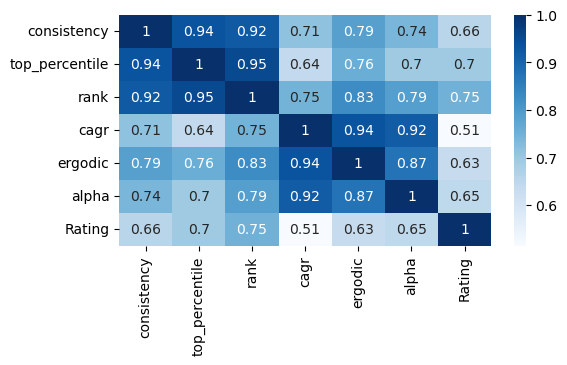

In [153]:
plt.figure(figsize=(6,3))
sns.heatmap(all_metrics.corr(), annot=True, cmap='Blues')

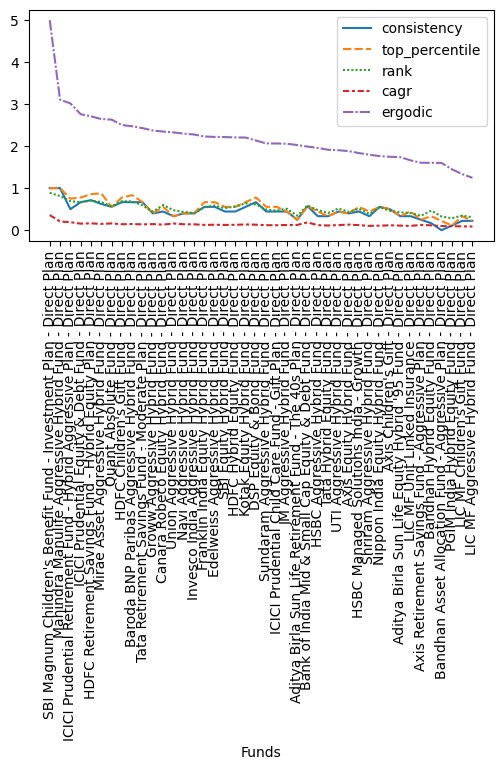

In [154]:
plt.figure(figsize=(6,3))
sns.lineplot(data=all_metrics.iloc[:, :5], sort=False)
# plt.xticks(np.arange(len(all_metrics)), [])
plt.xticks(rotation=90)
plt.show()

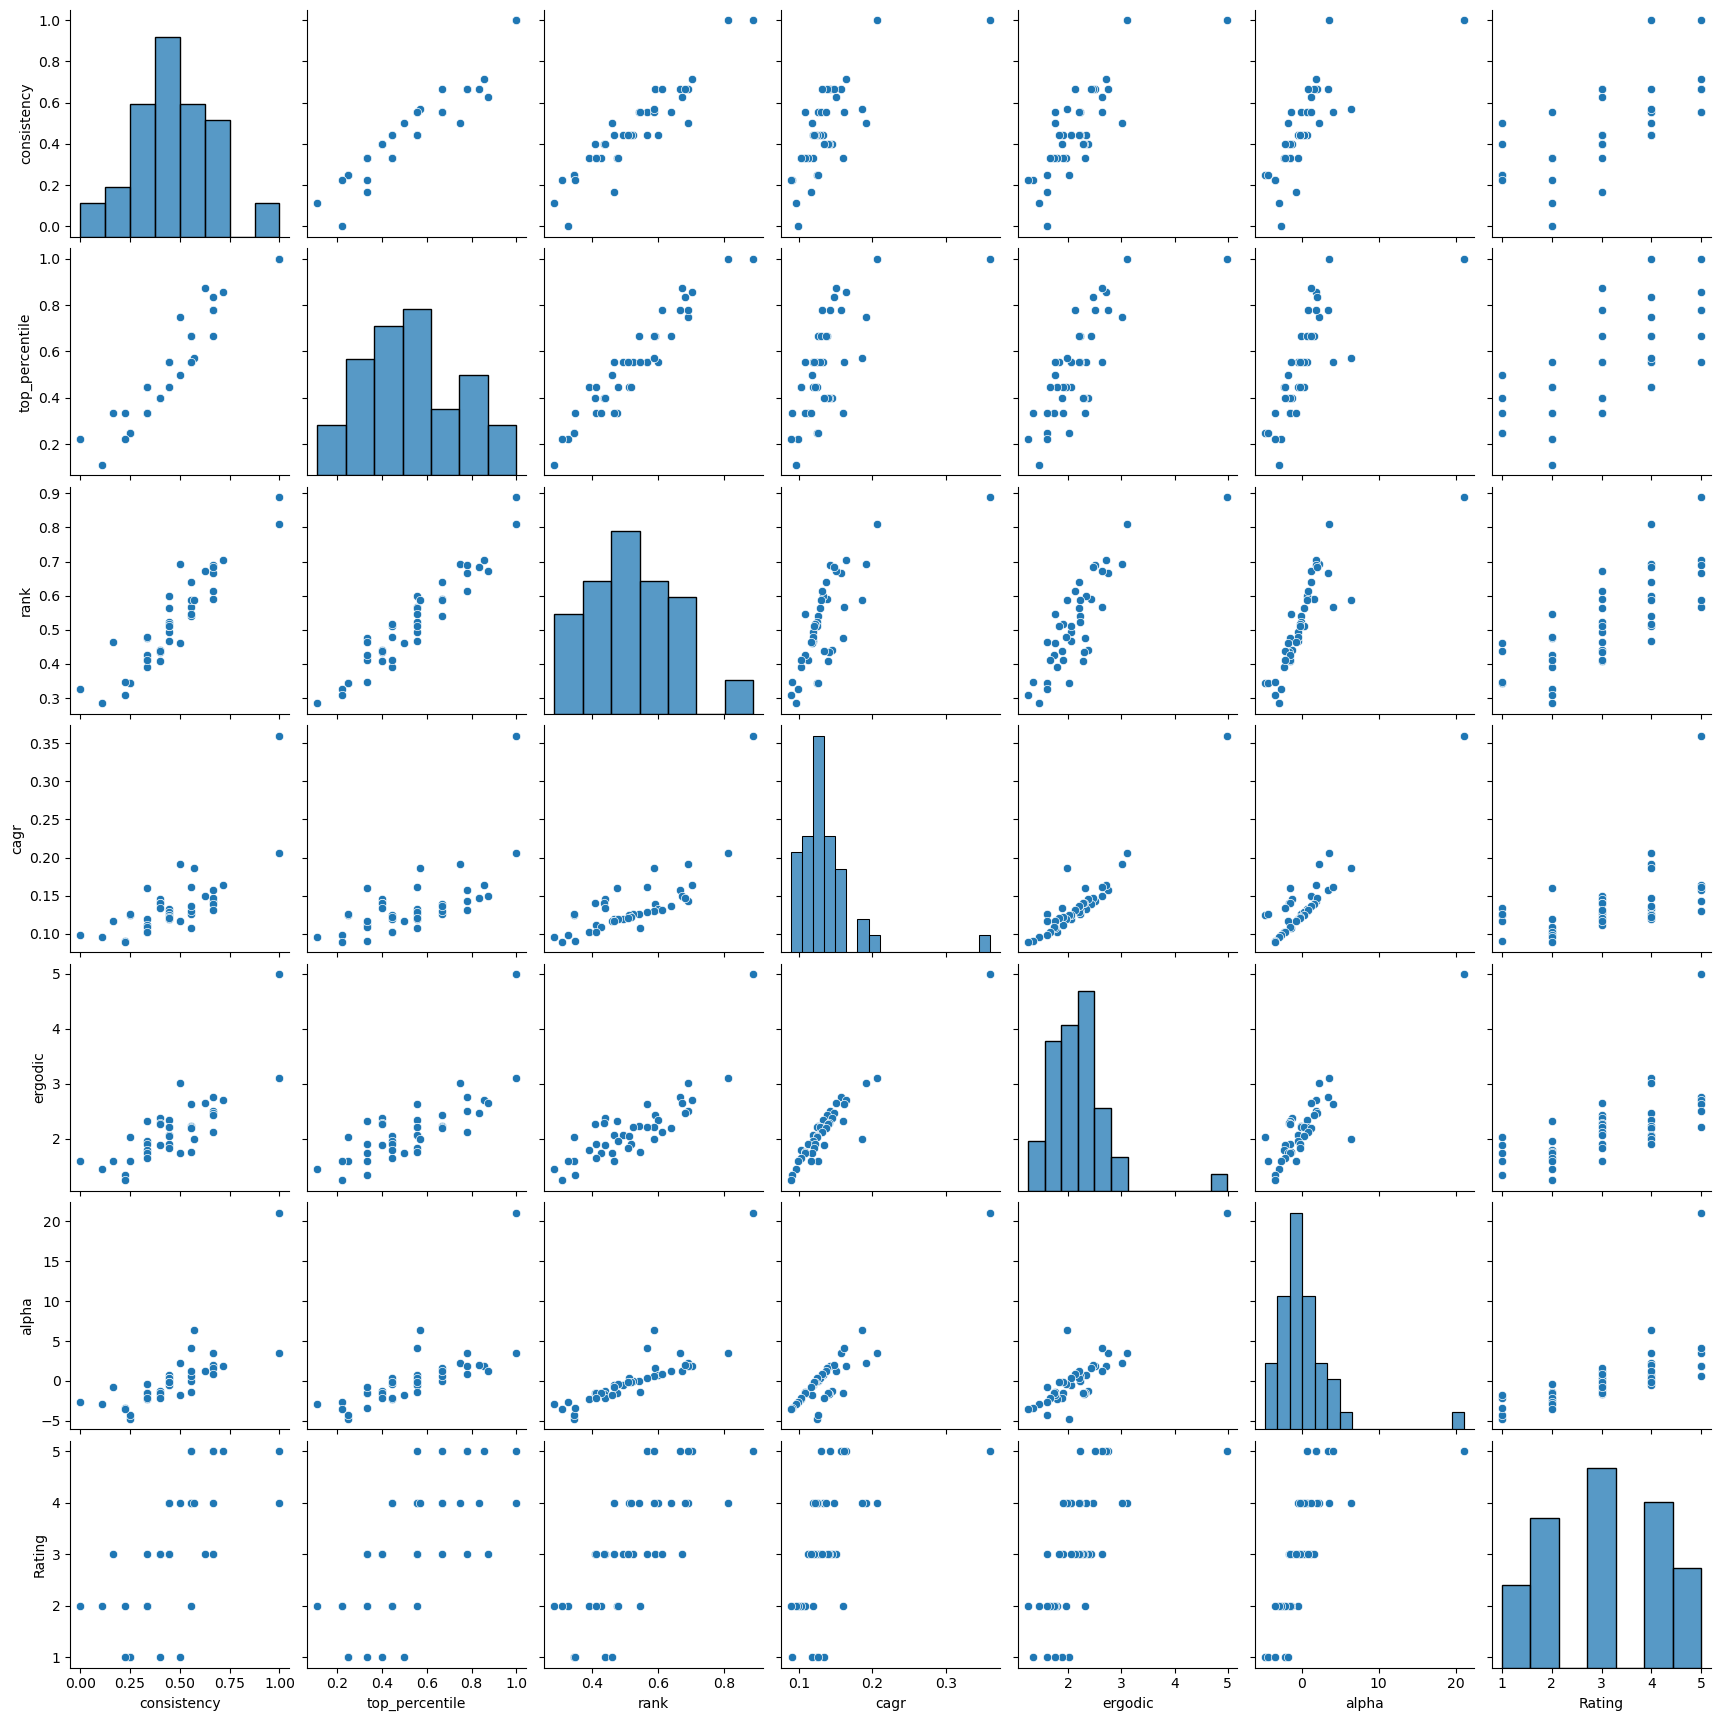

In [155]:
sns.pairplot(all_metrics)

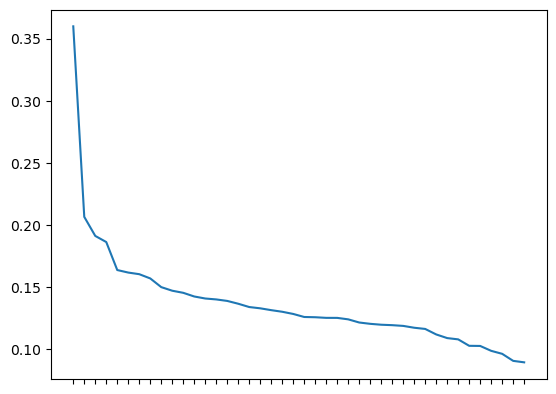

In [156]:
# dfdm.sum(axis=1).sort_values(ascending=False).plot()
plt.plot(cagr.sort_values(ascending=False))
plt.xticks(np.arange(len(dfdm)), [])
plt.show()

In [157]:
high = [2007,2009,2010,2012,2014,2017,2019,2020,2021,2023]
low = [2008,2011,2013,2015,2016,2018,2022]
s1 = dfdr.loc[:, high[-4:]].mean(axis=1).rename('high')
s2 = dfdr.loc[:, low[-3:]].mean(axis=1).rename('low')
hl = pd.concat([s1, s2], axis=1)
hl['diff'] = hl['high'] - hl['low']
hl.sort_values('diff', ascending=False)

,high,low,diff
Funds,,,
Bank of India Mid & Small Cap Equity & Debt Fund - Direct Plan,74.573413,6.324405,68.249008
Axis Equity Hybrid Fund - Direct Plan,53.055556,7.142857,45.912698
DSP Equity & Bond Fund - Direct Plan,75.059524,35.615079,39.444444
Axis Retirement Savings Fund - Aggressive Plan - Direct Plan,44.166667,4.761905,39.404762
ICICI Prudential Retirement Fund - Hybrid Aggressive Plan - Direct Plan,77.142857,45.238095,31.904762
HSBC Managed Solutions India - Growth - Direct Plan,61.240079,30.902778,30.337302
Axis Children's Gift - Direct Plan,58.829365,33.234127,25.595238
SBI Magnum Children's Benefit Fund - Investment Plan - Direct Plan,96.428571,73.809524,22.619048
HSBC Aggressive Hybrid Fund - Direct Plan,44.970238,26.438492,18.531746


A colorful plot to end.

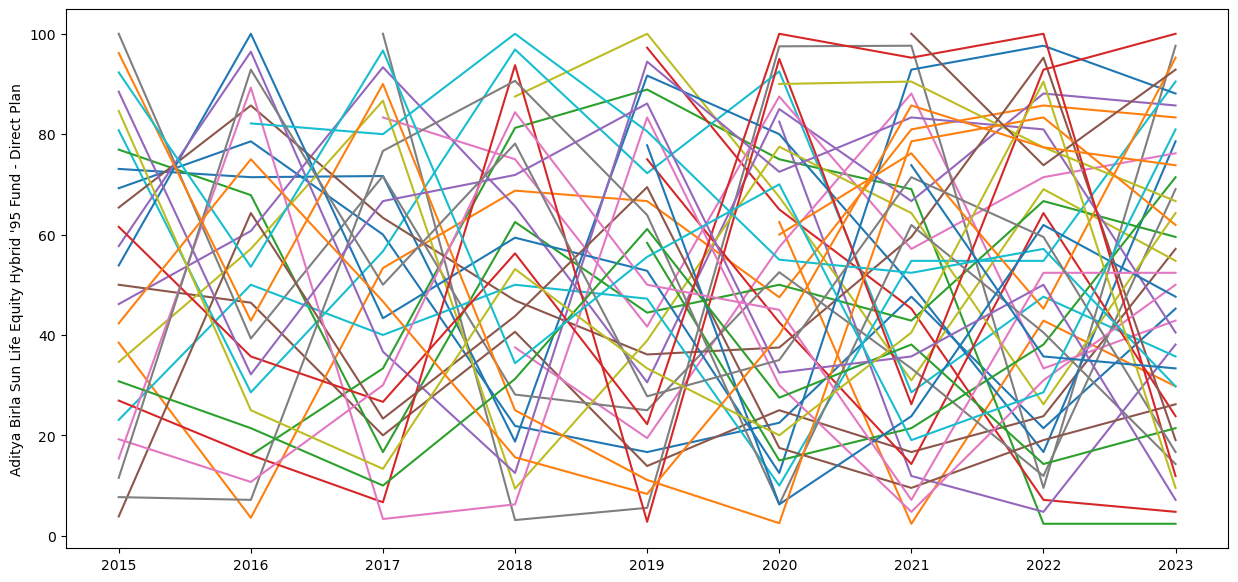

In [158]:
plt.figure(figsize=(15,7), dpi=100)
for index, row in dfdr.iloc[:, :-1].iterrows():
    sns.lineplot(data=row)